In [1]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
path_base = os.getcwd().split('Dragonfly44_SFH')[0] # hack, but works

from Dragonfly44_SFH.utils import prospect_io, plotting, transforms
from figure_style import *
from Dragonfly44_SFH.utils.styles import *

In [2]:
# contains filenames of Prospector output
from Dragonfly44_SFH.fitting.output.fits_DF44_summary import *

path_data = path_base+ "Dragonfly44_SFH/data/"
file_data = path_data+"Dragonfly44/obs_phot_specKCWI_sigma110.h5"

path_fits = path_base+ "Dragonfly44_SFH/fitting/output/"


In [3]:
all_cols = ['logmass','em_logmass','ep_logmass', \
            'logzsol','em_logzsol','ep_logzsol', \
            'FeH','em_FeH','ep_FeH', \
            'age_MW','em_age_MW','ep_age_MW', \
            'age_LW','em_age_LW','ep_age_LW', \
           ]

quantiles=[0.16,0.5,0.84]

In [4]:

from Dragonfly44_SFH.utils.transforms import chain_to_param
from Dragonfly44_SFH.utils.misc_utils import weighted_quantile
from copy import deepcopy

def add_to_df44_dict( ddict, result, calc_zts=False, thin_zts=10, quantiles=[0.16,0.5,0.84] ):
    w = result['weights']
    
    x = chain_to_param( param='mwa', **result )[:,0]
    qs = weighted_quantile( x, quantiles, w )
    ddict['age_MW'] = qs[1]
    ddict['em_age_MW'] = np.diff(qs)[0]
    ddict['ep_age_MW'] = np.diff(qs)[1]

    try:
        x = np.copy( result['draws']['lwa_lbol'] )
        qs = weighted_quantile( x, quantiles )
        ddict['age_LW'] = qs[1]
        ddict['em_age_LW'] = np.diff(qs)[0]
        ddict['ep_age_LW'] = np.diff(qs)[1]
    except:
        ddict['age_LW'] = np.nan
        ddict['em_age_LW'] = np.nan
        ddict['ep_age_LW'] = np.nan

    x = chain_to_param( param='logzsol', **result )[:,0]
    qs = weighted_quantile( x, quantiles, w )
    ddict['logzsol'] = qs[1]
    ddict['em_logzsol'] = np.diff(qs)[0]
    ddict['ep_logzsol'] = np.diff(qs)[1]

    x = chain_to_param( param='logmass', **result )[:,0]
    qs = weighted_quantile( x, quantiles, w )
    ddict['logmass'] = qs[1]
    ddict['em_logmass'] = np.diff(qs)[0]
    ddict['ep_logmass'] = np.diff(qs)[1]

    return ddict 

In [5]:
# fitting results from Webb+2022

# https://iopscience.iop.org/article/10.1088/2041-8205/798/2/L45
dict_df44_aD1 = dict( Galaxy='DF44', 
                      z = 0.02142, )

from Dragonfly44_SFH.utils import prospect_io

result_file = path_fits+ fit_aD1_phot_specKCWI
result, _, _ = prospect_io.read_results( result_file, file_data=file_data )
dict_df44_aD1 = add_to_df44_dict( dict_df44_aD1, result, quantiles=quantiles )
dict_df44_aD1['source'] = "aD1_both_full"


# just fit photometry
dict_df44_aD1_phot = deepcopy( dict_df44_aD1 )

result_file = path_fits+ fit_aD1_phot
result, _, _ = prospect_io.read_results( result_file, file_data=file_data )
dict_df44_aD1_phot = add_to_df44_dict( dict_df44_aD1_phot, result, quantiles=quantiles )
dict_df44_aD1_phot['source'] = "aD1_phot_full"


# max S/N of spectroscpy = 15
dict_df44_aD1_snr15 = deepcopy( dict_df44_aD1 )

result_file = path_fits+ fit_aD1_phot_specKCWI_snr15
result, _, _ = prospect_io.read_results( result_file, file_data=file_data )
dict_df44_aD1_snr15 = add_to_df44_dict( dict_df44_aD1_snr15, result, quantiles=quantiles )
dict_df44_aD1_snr15['source'] = "aD1_both_snr15"


# alphaD=0.2
dict_df44_aD02 = deepcopy( dict_df44_aD1 )

result_file = path_fits+ fit_aD02_phot_specKCWI
result, _, _ = prospect_io.read_results( result_file, file_data=file_data )
dict_df44_aD02 = add_to_df44_dict( dict_df44_aD02, result, quantiles=quantiles )
dict_df44_aD02['source'] = "aD02_both_full"


import pandas as pd
results_w22 = pd.concat([ pd.Series(dict_df44_aD1).to_frame().T, 
                       pd.Series(dict_df44_aD02).to_frame().T, 
                       pd.Series(dict_df44_aD1_phot).to_frame().T, 
                       pd.Series(dict_df44_aD1_snr15).to_frame().T, 
                     ])
results_w22

,Galaxy,z,age_MW,em_age_MW,ep_age_MW,age_LW,em_age_LW,ep_age_LW,logzsol,em_logzsol,ep_logzsol,logmass,em_logmass,ep_logmass,source
0,DF44,0.02142,10.195491,0.47629,0.343817,4.26799,0.350348,0.304469,-1.178149,0.009868,0.008819,8.484118,0.063708,0.016867,aD1_both_full
0,DF44,0.02142,13.060686,0.042868,0.022945,7.75336,0.437138,0.974253,-1.27081,0.018595,0.027622,8.585014,0.0306,0.032245,aD02_both_full
0,DF44,0.02142,6.784754,1.131322,1.036956,2.406312,0.670724,0.871813,-1.456622,0.330557,0.47238,8.222308,0.083492,0.081923,aD1_phot_full
0,DF44,0.02142,9.335469,1.064673,0.645827,3.448758,0.786491,1.032425,-1.130116,0.055076,0.047279,8.396133,0.045868,0.040982,aD1_both_snr15


In [6]:
#  results from Villaume+2022

dict_v22_1compSFH = dict( Galaxy='DF44', z = 0.02142 )
dict_v22_1compSFH['source'] = '1_comp'

# initialize with null entries
for col in all_cols:
    if col not in dict_v22_1compSFH.keys():
        dict_v22_1compSFH[col] = np.nan
dict_v22_2compSFH = deepcopy(dict_v22_1compSFH)    

dict_v22_1compSFH['FeH'] = -1.33
dict_v22_1compSFH['em_FeH'] = 0.04
dict_v22_1compSFH['ep_FeH'] = 0.05

dict_v22_1compSFH['age_LW'] = 10.2
dict_v22_1compSFH['em_age_LW'] = 0.9
dict_v22_1compSFH['ep_age_LW'] = 0.7

file_data_V22_Z = path_data+'Dragonfly44/Villaume2022_KCWI/df44_zh_posterior_for_kristi_10_12_2021.dat'
villaume2021_logzsol = np.loadtxt( file_data_V22_Z, unpack=1)
qs = np.quantile(villaume2021_logzsol, quantiles)
dqs = np.diff(qs)
for key in ['logzsol']:
    dict_v22_1compSFH[key] = qs[1]
    dict_v22_1compSFH['em_'+key] = dqs[0]
    dict_v22_1compSFH['ep_'+key] = dqs[1]

dict_v22_2compSFH['source'] = '2_comp'

dict_v22_2compSFH['FeH'] = -1.29
dict_v22_2compSFH['em_FeH'] = 0.02
dict_v22_2compSFH['ep_FeH'] = 0.028

dict_v22_2compSFH['age_LW'] = 9.8
dict_v22_2compSFH['em_age_LW'] = 0.7
dict_v22_2compSFH['ep_age_LW'] = 0.9

dict_v22_2compSFH['age_MW'] = 9.7
dict_v22_2compSFH['em_age_MW'] = 0.9
dict_v22_2compSFH['ep_age_MW'] = 1.1

results_v22 = pd.concat([ pd.Series(dict_v22_1compSFH).to_frame().T, pd.Series(dict_v22_2compSFH).to_frame().T ])
results_v22

,Galaxy,z,source,logmass,em_logmass,ep_logmass,logzsol,em_logzsol,ep_logzsol,FeH,em_FeH,ep_FeH,age_MW,em_age_MW,ep_age_MW,age_LW,em_age_LW,ep_age_LW
0,DF44,0.02142,1_comp,NaN,NaN,NaN,-1.1913,0.0564,0.0628,-1.33,0.04,0.05,NaN,NaN,NaN,10.2,0.9,0.7
0,DF44,0.02142,2_comp,NaN,NaN,NaN,NaN,NaN,NaN,-1.29,0.02,0.028,9.7,0.9,1.1,9.8,0.7,0.9


In [7]:
# gu + 2018 

file_data_G18_table1 = path_data+'Dragonfly44/Gu2018_MANGA/gu2018_table1.csv' # adapted from published paper

# r_eff from vandokkum+2015a
results_gu18 = pd.read_csv(file_data_G18_table1)
results_gu18.rename( columns={'Target':'Galaxy', "[Fe/H]":"FeH", "em_[Fe/H]":"em_FeH", "ep_[Fe/H]":"ep_FeH", \
                            "r_eff":"r_eff_self", "em_r_eff":"em_r_eff_self", "ep_[r_eff":"ep_[r_eff_self"}, 
                  inplace=True)

# all other entries null
for col in all_cols:
    if col not in results_gu18.columns:
        results_gu18[col] = np.full( len(results_gu18), np.nan )
        
# convert values
x,ex_m,ex_p = results_gu18[['log(age/Gyr)','em_log(age/Gyr)','ep_log(age/Gyr)'] ].values.T
x2 = 10**x
ex2_m = x2 * ex_m * np.log(10)
ex2_p = x2 * ex_p * np.log(10)
(x2,ex2_m,ex2_p) = np.array([x2,ex2_m,ex2_p]) 
results_gu18['age_LW'] = x2
results_gu18['em_age_LW'] = ex2_m
results_gu18['ep_age_LW'] = ex2_p

file_data_G18_logzsol_spec = path_data+'Dragonfly44/Gu2018_MANGA/df44_zh_posterior_gu2018_for_kristi_01_24_2022.dat' # private communivation
logzsol = np.loadtxt(file_data_G18_logzsol_spec)
qs = np.quantile( logzsol, quantiles )
dqs = np.diff(qs)
idx = results_gu18.query('(Galaxy=="DF44") & (constraints=="spectra")').index.values[0]
results_gu18.loc[idx,'logzsol'] = qs[1]
results_gu18.loc[idx,'em_logzsol'] = dqs[0]
results_gu18.loc[idx,'ep_logzsol'] = dqs[1]

     
file_data_G18_logzsol_both = path_data+'Dragonfly44/Gu2018_MANGA/UDG1_MPL11.csv' # private communivation
logzsol = np.loadtxt(file_data_G18_logzsol_both, unpack=True, skiprows=1, delimiter=',')[2]
qs = np.quantile( logzsol, quantiles )
dqs = np.diff(qs)
idx = results_gu18.query('(Galaxy=="DF44") & (constraints=="both")').index.values[0]
results_gu18.loc[idx,'logzsol'] = qs[1]
results_gu18.loc[idx,'em_logzsol'] = dqs[0]
results_gu18.loc[idx,'ep_logzsol'] = dqs[1]
                
results_gu18

,Galaxy,constraints,SNR,log(age/Gyr),em_log(age/Gyr),ep_log(age/Gyr),FeH,em_FeH,ep_FeH,logmass,...,e_mu_c,logzsol,em_logzsol,ep_logzsol,age_MW,em_age_MW,ep_age_MW,age_LW,em_age_LW,ep_age_LW
0,DF7,spectra,9.5,0.93,0.18,0.17,-1.03,0.34,0.31,8.74,...,0.5,NaN,NaN,NaN,NaN,NaN,NaN,8.511380,3.527672,3.331690
1,DF44,spectra,7.9,1.02,0.24,0.11,-1.25,0.39,0.33,8.66,...,0.5,-1.0653,0.0313,0.0350,NaN,NaN,NaN,10.471285,5.786646,2.652213
2,DF17,spectra,5.0,0.88,0.42,0.22,-0.83,0.51,0.56,8.42,...,0.5,NaN,NaN,NaN,NaN,NaN,NaN,7.585776,7.336096,3.842717
3,DF7,both,9.5,0.90,0.16,0.17,-1.04,0.36,0.32,8.72,...,0.5,NaN,NaN,NaN,NaN,NaN,NaN,7.943282,2.926413,3.109314
4,DF44,both,7.9,0.95,0.20,0.17,-1.25,0.41,0.35,8.61,...,0.6,-1.4456,0.1997,0.3388,NaN,NaN,NaN,8.912509,4.104362,3.488708
5,DF17,both,5.0,0.96,0.40,0.16,-0.80,0.47,0.49,8.49,...,0.5,NaN,NaN,NaN,NaN,NaN,NaN,9.120108,8.399930,3.359972


In [8]:
params_spec = dict( marker='s', s=100, lw=1.5 )
params_phot = dict( marker='o', s=100, lw=1.5 )
params_both = dict( marker='D', s=180, lw=1.7 )

def get_data_x3_from_data( table, cols ):
    if type(table) is dict:
        x,em_x,ep_x = [ table[key] for key in cols]
        ex = np.array([[em_x],[ep_x]])
        x = np.array(x)
    else:
        x,em_x,ep_x = table[cols].values.T
        ex = np.array([em_x,ep_x])
    return x, ex

def plot_cols( axes, table, col_x=None, cols_y=None, params=None, ebparams=None, **extras  ):
    
    x, ex = get_data_x3_from_data( table, [col_x,'em_'+col_x,'ep_'+col_x])
            
    for j,col_y in enumerate( cols_y ):
        y,ey = get_data_x3_from_data( table, [col_y,'em_'+col_y,'ep_'+col_y])

        try:
            params.update( extras )
            axes[j].scatter(  x, y, **params ) 
            axes[j].errorbar( x, y, xerr=ex, yerr=ey, **ebparams )
        except:
            pass
            
def draw_connection( tab1, tab2, params_c=None, cols_x=None, cols_y=None, axes=None, xoff=0, yoff=0, **extras ):

    for i,col_x in enumerate( cols_x ):
        axes_i = axes[i]
        
        x1, _ = get_data_x3_from_data( tab1, [col_x,'em_'+col_x,'ep_'+col_x])
        x2, _ = get_data_x3_from_data( tab2, [col_x,'em_'+col_x,'ep_'+col_x])

        for j,col_y in enumerate( cols_y ):
            ax = axes_i[j]
            
            y1,_ = get_data_x3_from_data( tab1, [col_y,'em_'+col_y,'ep_'+col_y])
            y2,_ = get_data_x3_from_data( tab2, [col_y,'em_'+col_y,'ep_'+col_y])
            y1 += yoff
            y2 += yoff
            x1 += xoff
            x2 += xoff
            
            if type(x1)==np.ndarray: x1=float(x1)
            if type(x2)==np.ndarray: x2=float(x2)
            if type(y1)==np.ndarray: y1=float(y1)
            if type(y2)==np.ndarray: y2=float(y2)

            ax.plot(  [x1,x2], [y1,y2], lw=2, color='w', zorder=params_c['zorder']-0.001  ) 
            ax.plot(  [x1,x2], [y1,y2], **params_c ) 

def draw_connection_diffx( tab1, tab2, params_c=None, yoff=0, cols_x1=None, cols_x2=None, cols_y=None, axes=None, **extras ):

    for i,col_x1 in enumerate( cols_x1 ):
        col_x2 = cols_x2[i]
        axes_i = axes[i]
        
        x1, _ = get_data_x3_from_data( tab1, [col_x1,'em_'+col_x1,'ep_'+col_x1])
        x2, _ = get_data_x3_from_data( tab2, [col_x2,'em_'+col_x2,'ep_'+col_x2])

        for j,col_y in enumerate( cols_y ):
            ax = axes_i[j]
            
            y1,_ = get_data_x3_from_data( tab1, [col_y,'em_'+col_y,'ep_'+col_y])
            y2,_ = get_data_x3_from_data( tab2, [col_y,'em_'+col_y,'ep_'+col_y])
            y1 += yoff
            y2 += yoff

            if type(x1)==np.ndarray: x1=float(x1)
            if type(x2)==np.ndarray: x2=float(x2)
            if type(y1)==np.ndarray: y1=float(y1)
            if type(y2)==np.ndarray: y2=float(y2)
                
            ax.plot(  [x1,x2], [y1,y2], lw=2, color='w', zorder=params_c['zorder']-0.001  ) 
            ax.plot(  [x1,x2], [y1,y2], **params_c )    

In [9]:
import matplotlib.patheffects as fx


/Users/kawebb/venv3/lib/python3.9/site-packages/matplotlib/axes/_base.py:2287: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


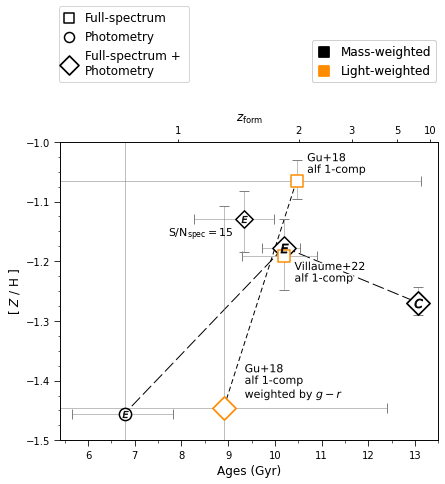

In [10]:
# with  

col_x_a  = 'age_MW'
col_x_b  = 'age_LW'
col_y = 'logzsol'

label_x = 'Ages (Gyr)'
label_y = r'[ $Z$ / H ]'

col1, col2 = 'k', 'darkorange'

params = dict( zorder=1.2 )
ebparams = dict( color='0.5', mec='None', mfc='w', fmt=' ', ms=6, marker='s', capsize=5, zorder=0.2, lw=0.5 ) 

if True: # figure elements

    fig, ((ax_leg),(ax)) = plt.subplots(2,1, figsize=(fig_width_one, 0.4*textheight), 
                                        gridspec_kw=dict(height_ratios=[0.2,1]))    
    ax_leg.axis('off')

    fs = 12
    ax.set_xlabel( label_x, fontsize=fs )
    ax.set_ylabel( label_y, fontsize=fs )

    ax.tick_params(direction='out', length=6, which='major')
    ax.tick_params(direction='out', length=2.5, which='minor')                

if True: # legend
    
    handles =  [ ax_leg.scatter( [],[], fc='w', ec='k', **params_spec ), 
                 ax_leg.scatter( [],[], fc='w', ec='k', **params_phot ), 
                 ax_leg.scatter( [],[], fc='w', ec='k', **params_both ),
               ]
    
    labels = ['Full-spectrum',
               'Photometry',
               'Full-spectrum + \nPhotometry',
              ]
    leg2 = ax_leg.legend( handles, labels, ncol=1, numpoints=1, loc=3, handler_map={tuple: HandlerTuple(ndivide=None)}, \
                          markerscale=1, handlelength=1, bbox_to_anchor=[-0.02,0], fontsize=12 )  

    handles =  [ ax_leg.scatter( [],[], fc=col1, ec=col1, marker='s', s=180, lw=1.7 ), \
                 ax_leg.scatter( [],[], fc=col2, ec=col2, marker='s', s=180, lw=1.7 ), \
               ]
    labels = ['Mass-weighted','Light-weighted']
    leg3 = ax_leg.legend( handles, labels, loc=4, handlelength=1.2, markerscale=0.7, bbox_to_anchor=[1+0.01,0], \
                          handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize=12 )

    ax_leg.add_artist(leg2)
    ax_leg.add_artist(leg3)    
        
if True: # plot things 
    
    ms = 1.5
    mlw = 1.
    
    text_params1 = dict( fontsize=11, color='k' )
    yoo, xoo = -0.01, 0.22    
    
    arrowprops = dict( width=8, headwidth=19, headlength=14, color='0.9', lw=1, ls='-', zorder=-2 )    
    text_params2 = dict( xycoords='data', textcoords='data', fontsize=0, zorder=-2 )

    col_x = col_x_a    
    params_base = dict( zorder=1.2, facecolor='w' )
    for tab,marker1_params,marker2_params,text_params in [ 
                            [ results_w22.query('source=="aD1_both_full"'), \
                                                    dict( marker='D', s=180*ms, lw=1.5, edgecolor=col1 ), \
                                                    dict( marker='$E$', s=(180*ms)*0.3, lw=0.8, color='k', zorder=10 ), \
                                                    dict(label=r'', xo=xoo+0.06, yo=-yoo, va='bottom', ha='left') ],
        
                            [ results_w22.query('source=="aD02_both_full"'), \
                                                    dict( marker='D', s=180*ms, lw=1.7, edgecolor=col1 ), \
                                                    dict( marker="$C$", s=(180*ms)*0.3, lw=0.8, color='k',  ), \
                                                    dict(label=r'', xo=-xoo*2, yo=-yoo, va='top', ha='right') ],

                            [ results_w22.query('source=="aD1_phot_full"'), \
                                                    dict( marker='o', s=100*ms, lw=1.5, edgecolor=col1 ), \
                                                    dict( marker='$E$', s=(100*ms)*0.3, lw=0.5, color='k' ), \
                                                    dict(label=r'', xo=xoo, yo=yoo, va='top', ha='left') ],
        
                            [ results_w22.query('source=="aD1_both_snr15"'), \
                                                    dict( marker='D', s=100*ms, lw=1.5, edgecolor=col1 ), \
                                                    dict( marker='$E$', s=(100*ms)*0.3, lw=0.5, color='k' ), \
                                                    dict(label=r'$\mathrm{S/N}_\mathrm{spec} = 15$', xo=-xoo, yo=yoo, va='top', ha='right', color='0.8') ],
        
                            [ results_v22.query('source=="2_comp"'), \
                                                    dict( marker='s', s=100*ms, lw=1.5, edgecolor=col1 ), \
                                                    dict( marker='v', s=0, lw=0.7, edgecolor='k', facecolor='w' ), \
                                                    dict(label='Villaume+22\nalf 2-comp', xo=-xoo, yo=-yoo, va='bottom', ha='right') ],
        
                           ]:
        plot_cols( [ax], tab, col_x=col_x, cols_y=[col_y], params=marker1_params, ebparams=ebparams, **params_base  )

        x,_ = get_data_x3_from_data( tab, [col_x,'em_'+col_x,'ep_'+col_x] )
        y,_ = get_data_x3_from_data( tab, [col_y,'em_'+col_y,'ep_'+col_y] )
        marker2_params.update( dict( zorder=2 ) )
        ax.scatter( x, y, **marker2_params )
        
        label, xo, yo, ha, va = [ text_params[key] for key in ['label', 'xo', 'yo', 'ha', 'va'] ]
        ax.text( x+xo, y+yo, label, va=va, ha=ha, **text_params1 )    
    
    col_x = col_x_b
    params_base = dict( zorder=1.2, edgecolor=col2, facecolor='w' ) 
    for tab,marker1_params,marker2_params,text_params in [ 
                            [ results_gu18.query('(constraints=="spectra")&(Galaxy=="DF44")'),
                                                    dict( marker='s', s=100*ms, lw=1.5 ), \
                                                    dict( marker='2', s=0, lw=1., color=params_base['edgecolor'] ), \
                                                    dict(label='Gu+18\nalf 1-comp', xo=xoo, yo=-yoo, va='bottom', ha='left') ],
                            [ results_gu18.query('(constraints=="both")&(Galaxy=="DF44")'),            
                                                    dict( marker='D', s=180*ms, lw=1.7 ), \
                                                    dict( marker='2', s=0, lw=1., color=params_base['edgecolor'] ), \
                                                    dict(label='Gu+18\nalf 1-comp\n'+r'weighted by $g-r$', xo=xoo*2, yo=-yoo, va='bottom', ha='left') ],
                            [ results_v22.query('source=="1_comp"'),
                                                    dict( marker='s', s=100*ms, lw=1.5 ), \
                                                    dict( marker='v', s=0, lw=0.7, edgecolor=params_base['edgecolor'], facecolor='w' ), \
                                                    dict(label='Villaume+22\nalf 1-comp', xo=xoo, yo=yoo, va='top', ha='left') ],
                                       ]:
        
        plot_cols( [ax], tab, col_x=col_x, cols_y=[col_y], params=marker1_params, ebparams=ebparams, **params_base  )

        x,_ = get_data_x3_from_data( tab, [col_x,'em_'+col_x,'ep_'+col_x] )
        y,_ = get_data_x3_from_data( tab, [col_y,'em_'+col_y,'ep_'+col_y] )
        marker2_params.update( dict( zorder=2 ) )
        ax.scatter( x, y, **marker2_params )
                
        label, xo, yo, ha, va = [ text_params[key] for key in ['label', 'xo', 'yo', 'ha', 'va'] ]
        text = ax.text( x+xo, y+yo, label, va=va, ha=ha, **text_params1 ) 
        text.set_path_effects([ fx.Stroke(linewidth=3, foreground='1.0'), fx.Normal() ])
        
if True: # connecting points 
    
    params_connect1 = dict( zorder=0.1, lw=1., color='k', dashes=(5,3) )
    params_connect2 = dict( zorder=0.1, lw=1., color='k', dashes=(12,4) )
      
    # zoom in
    axes = [[ax],[ax]]
    params_connect_c_lwa = dict( axes=axes, cols_y=[col_y], cols_x=[ col_x_b ] )
    params_connect_c_mwa = dict( axes=axes, cols_y=[col_y], cols_x=[ col_x_a ] )
    params_connect_c_mix = dict( axes=axes, cols_y=[col_y], cols_x1=[ col_x_b ], cols_x2=[ col_x_a ] )
    
    draw_connection( results_gu18.query('(constraints=="both")&(Galaxy=="DF44")'),  
                     results_gu18.query('(constraints=="spectra")&(Galaxy=="DF44")'), \
                     yoff=0.0018, params_c=params_connect1, **params_connect_c_lwa )

    yoff = 0.0015
    draw_connection( results_w22.query('source=="aD1_both_full"'), results_w22.query('source=="aD02_both_full"'), \
                       params_c=params_connect2, yoff=yoff, **params_connect_c_mwa )
    draw_connection( results_w22.query('source=="aD1_both_full"'), results_w22.query('source=="aD1_phot_full"'), \
                       params_c=params_connect2, yoff=yoff, **params_connect_c_mwa )
    
    draw_connection_diffx( results_v22.query('source=="1_comp"'),  results_v22.query('source=="2_comp"'), \
                             params_c=params_connect1, **params_connect_c_mix )
                 
if True: # figure tweaks   
    
    yticks = np.arange(-1.5,-0.8,0.1)
    ax.set_yticks( yticks )
    ax.set_yticks( np.arange( yticks[0],yticks[-1],0.025), minor=True )
    
    xticks = np.arange(0,16,1)
    ax.set_xticks( xticks )
    ax.set_xticks( np.arange( xticks[0],xticks[-1],0.5), minor=True )
    
    ax.set( ylim=(-1.5,-1), xlim=(5.4,13.5) ) 
#     ax.annotate('DF44', xy=(0,0), xytext=(0.03,0.95), xycoords='axes fraction', va='top', fontsize=14, \
#                   bbox=dict(fc="w", ec="k", lw=1))
    
    fig.subplots_adjust( hspace=0.3 )

if True: # twiny axis    
    zvals = [0.1,0.2,0.5,1,2,3,5,10]
    from prospect.sources.constants import cosmo 
    ages = [cosmo.age(0).value-cosmo.age(z).value for z in zvals]
    
    tax = ax.twiny()
    tax.set_xticks(ages)
    tax.set_xticklabels(zvals)
    tax.set_xlim(ax.get_xlim())
    tax.set_xlabel(r'$z_\mathrm{form}$', fontsize=fs)     
    
plt.savefig( 'figures/fig6.pdf', **saveparams)
plt.show()    